In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
sns.set_context('talk')
# sys.path.append('/Users/urebbapr/research/opticalcomm/MLOC/src')

# from functools          import partial
# from matplotlib.patches import Patch
# from matplotlib.ticker  import FormatStrFormatter
# from types              import SimpleNamespace as SN


In [2]:
# a = pd.HDFStore('pwv.h5')
# a.keys()
# a.close()
df_scores_nofilt = pd.read_hdf('vapor.scores.nofilt.h5', 'scores')
df_scores_filtrd = pd.read_hdf('vapor.scores.filtrd.h5', 'scores')

In [4]:
df_scores_nofilt

,R2,RMSE,MAPE
Forecast,,,
0,0.681273,0.262406,0.433307
30,0.673702,0.265619,0.441155
60,0.669940,0.267264,0.445793
90,0.662648,0.270320,0.448987
120,0.653678,0.274012,0.456738
150,0.648213,0.276296,0.461979
180,0.637843,0.280480,0.466801


In [5]:
df_scores_filtrd

,R2,RMSE,MAPE
Forecast,,,
0,0.280396,0.156808,0.400049
30,0.261995,0.158358,0.405610
60,0.241495,0.160211,0.412330
90,0.225975,0.161556,0.414823
120,0.215069,0.162453,0.419835
150,0.189926,0.164912,0.427357
180,0.179500,0.165860,0.431906


In [7]:
d = {30: [0.030, 0.052, 0.995],
     60: [0.057, 0.096, 0.983],
     90: [0.075, 0.124, 0.970],
     120: [0.090, 0.148, 0.958],
     150: [0.103, 0.170, 0.945],
     180: [0.115, 0.189, 0.932]}
d = {'RMSE': [0.030, 0.057, 0.075, 0.090, 0.103, 0.115],
     'MAPE': [0.052, 0.096, 0.124, 0.148, 0.170, 0.189],
     'R2': [0.995, 0.983, 0.970, 0.958, 0.945, 0.932]}
df_scores_with_hist = pd.DataFrame(index=df_scores_nofilt.index[1:], data=d, columns=['RMSE', 'MAPE', 'R2'])
df_scores_with_hist

,RMSE,MAPE,R2
Forecast,,,
30,0.030,0.052,0.995
60,0.057,0.096,0.983
90,0.075,0.124,0.970
120,0.090,0.148,0.958
150,0.103,0.170,0.945
180,0.115,0.189,0.932


In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(25, 7))

# ax[0].plot(df_scores.index, df_scores.RMSE)
# ax[0].set_ylabel('RMSE')
# ax[0].set_xlabel('Forecast (mins)')
# ax[0].set_xticks(range(0, 210, 30))

# ax[1].plot(df_scores.index, df_scores.MAPE*100)
# ax[1].set_ylabel('MAPE')
# ax[1].set_xlabel('Forecast (mins)')
# ax[1].set_xticks(range(0, 210, 30))

# ax[2].plot(df_scores.index, df_scores.R2)
# ax[2].set_ylabel('R2')
# ax[2].set_xlabel('Forecast (mins)')
# ax[2].set_xticks(range(0, 210, 30))
# plt.savefig('PWV_metrics.png')

# Now include with historical

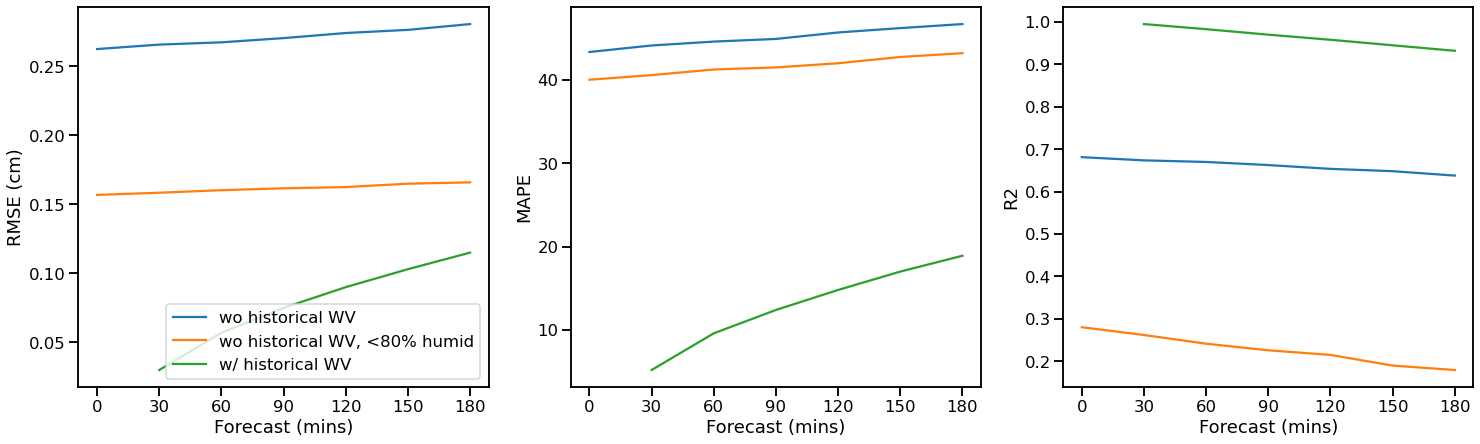

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7))

ax[0].plot(df_scores_nofilt.index, df_scores_nofilt.RMSE, label='wo historical WV')
ax[0].plot(df_scores_filtrd.index, df_scores_filtrd.RMSE, label='wo historical WV, <80% humid')

ax[0].plot(df_scores_with_hist.index, df_scores_with_hist.RMSE, label='w/ historical WV')
ax[0].set_ylabel('RMSE (cm)')
ax[0].set_xlabel('Forecast (mins)')
ax[0].set_xticks(range(0, 210, 30))
ax[0].legend()

ax[1].plot(df_scores_nofilt.index, df_scores_nofilt.MAPE*100, label='wo historical WV')
ax[1].plot(df_scores_filtrd.index, df_scores_filtrd.MAPE*100, label='wo historical WV, <80% humid')
ax[1].plot(df_scores_with_hist.index, df_scores_with_hist.MAPE*100, label='w/ historical WV')

ax[1].set_ylabel('MAPE')
ax[1].set_xlabel('Forecast (mins)')
ax[1].set_xticks(range(0, 210, 30))

ax[2].plot(df_scores_nofilt.index, df_scores_nofilt.R2, label='wo historical WV')
ax[2].plot(df_scores_filtrd.index, df_scores_filtrd.R2, label='wo historical WV, <80% humid')
ax[2].plot(df_scores_with_hist.index, df_scores_with_hist.R2, label='w/ historical WV')
ax[2].set_ylabel('R2')
ax[2].set_xlabel('Forecast (mins)')
ax[2].set_xticks(range(0, 210, 30))
plt.savefig('PWV_metrics_nofilt_filtrd_hist.png')